<table align="center" width="100%">
    <tr>
        <td>
            <div align="center">
                <font color="#900008" size="8px">
                    <b>Airline Passenger Satisfaction</b>
                </font>
            </div>
        </td>
    </tr>
</table>


## Problem Statement :-

In this study the aim is to identify the level of satisfaction of the passengers to know the quality of services provided by the airline companies, the key factors that derive customer satisfaction and to identify the ways how the airline industry can improve the service quality.

## Data Definition :-

**Gender** : Gender of the passengers (Female, Male)

**Customer Type** : The customer type (Loyal customer, disloyal customer)

**Age** : The actual age of the passengers

**Type of Travel** : Purpose of the flight of the passengers (Personal Travel, Business Travel)

**Customer Class** : Travel class in the plane of the passengers (Business, Eco, Eco Plus)

**Flight distance** : The flight distance of this journey

**Inflight wifi service** : Satisfaction level of the inflight wifi service (Applicable:1-5)

**Departure Arrival time convenient** : Satisfaction level of Departure Arrival time convenient (Applicable:1-5)

**Ease of Online booking** : Satisfaction level of online booking (Applicable:1-5)

**Gate location** : Satisfaction level of Gate location (Applicable:1-5)

**Food and drink** : Satisfaction level of Food and drink (Applicable:1-5)

**Online boarding** : Satisfaction level of online boarding (Applicable:1-5)

**Seat comfort** : Satisfaction level of Seat comfort (Applicable:1-5)

**Inflight entertainment** : Satisfaction level of inflight entertainment (Applicable:1-5)

**On-board service** : Satisfaction level of On-board service (Applicable:1-5)

**Leg room service** : Satisfaction level of Leg room service (Applicable:1-5)

**Baggage handling** : Satisfaction level of baggage handling (Applicable:1-5)

**Check-in service** : Satisfaction level of Check-in service (Applicable:1-5)

**Inflight service** : Satisfaction level of inflight service (Applicable:1-5)

**Cleanliness** : Satisfaction level of Cleanliness

**Departure Delay in Minutes** : Minutes delayed when departure

**Arrival Delay in Minutes** : Minutes delayed when Arrival


**Satisfaction** : Airline satisfaction level (Satisfaction, neutral or dissatisfaction)



## Table of Content :-

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data](#RD)**
4. **[Data Analysis and Preparation](#data_preparation)**
    - 4.1 - **[Understand the Dataset](#Data_Understanding)**
               1. **[Data Type](#Data_Types)**
               2. **[Summary Statistics](#Summary_Statistics)**
               3. **[Missing Values](#Missing_Values)**      
               4. **[Distribution of Variables](#distribution_variables)**
               5. **[Correlation](#correlation)**
               6. **[Discover Outliers](#outliers)**
    - 4.2 - **[Prepare the Data](#Data_Preparation)**
5. **[Logistic Regression](#LogisticReg)**
    - 5.1 - **[Logistic Regression (using MLE)](#withStatsModels)**
    - 5.2 - **[Logistic Regression (using SGD)](#usingSGD)**
6. **[Random Forest](#Random_Forest)**
    - 6.1 - **[Random Forest Model](#RF_Model)**
7. **[Decision Tree](#DecisionTree)**
    - 7.1 - **[Decision Tree](#DecisionTreeWFS)**
    - 7.2 - **[Decision Tree (using GridSearchCV)](#DecisionTreewithGridSearchCv)**

8. **[Conclusion and Interpretation](#conclusion)**

<a id='import_lib'></a>
# 1. Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns
from pandas.api.types import is_string_dtype

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

import statsmodels
import statsmodels.api as sm

from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image  
import graphviz

from sklearn.ensemble import RandomForestClassifier


<a id='set_options'></a>
# 2. Set Options

In [2]:
pd.options.display.max_columns = None

pd.options.display.max_rows = None

np.set_printoptions(suppress=True)

<a id='RD'></a>
# 3. Read Data

In [3]:
df_airline=pd.read_csv("airline_passenger_satisfaction.csv")
df_airline.sample(5)

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
13371,13371,Male,Loyal Customer,43,Business travel,Business,2998,2,2,2,2,3,4,4,2,2,2,2,5,2,3,12,10.0,satisfied
101398,101398,Male,Loyal Customer,36,Business travel,Business,2951,3,2,2,2,4,2,2,3,3,3,3,4,3,1,0,4.0,neutral or dissatisfied
61639,61639,Female,Loyal Customer,80,Business travel,Business,3709,2,5,5,5,1,4,3,2,2,2,2,4,2,4,31,22.0,neutral or dissatisfied
44295,44295,Female,Loyal Customer,48,Business travel,Business,3260,3,3,4,3,4,4,3,3,3,3,3,3,3,1,0,0.0,neutral or dissatisfied
64439,64439,Male,Loyal Customer,37,Personal Travel,Eco,2454,3,4,3,3,5,3,4,5,1,2,3,1,3,5,0,0.0,neutral or dissatisfied


In [4]:
df_airline=pd.read_csv("airline_passenger_satisfaction.csv",index_col=0)
df_airline.sample(4)

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
36229,Female,Loyal Customer,24,Business travel,Business,3173,5,5,5,5,4,4,4,4,2,5,2,3,3,4,14,22.0,satisfied
8625,Male,disloyal Customer,34,Business travel,Business,1723,2,2,2,1,2,2,2,2,4,3,4,4,4,2,19,1.0,neutral or dissatisfied
112446,Female,disloyal Customer,25,Business travel,Business,731,3,0,3,2,3,3,3,3,4,4,4,3,4,3,0,0.0,neutral or dissatisfied
69923,Female,Loyal Customer,44,Business travel,Eco,395,5,4,4,4,4,4,1,5,5,5,5,1,5,2,0,0.0,satisfied


In [5]:
df_airline.shape

(129880, 23)

<a id='data_preparation'></a>
# 4. Data Analysis and Preparation

In [6]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   customer_type                      129880 non-null  object 
 2   age                                129880 non-null  int64  
 3   type_of_travel                     129880 non-null  object 
 4   customer_class                     129880 non-null  object 
 5   flight_distance                    129880 non-null  int64  
 6   inflight_wifi_service              129880 non-null  int64  
 7   departure_arrival_time_convenient  129880 non-null  int64  
 8   ease_of_online_booking             129880 non-null  int64  
 9   gate_location                      129880 non-null  int64  
 10  food_and_drink                     129880 non-null  int64  
 11  online_boarding                    1298

In [7]:
df_airline.describe().T

,count,mean,std,min,25%,50%,75%,max
age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
flight_distance,129880.0,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
inflight_wifi_service,129880.0,2.728696,1.329340,0.0,2.0,3.0,4.0,5.0
departure_arrival_time_convenient,129880.0,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
ease_of_online_booking,129880.0,2.756876,1.401740,0.0,2.0,3.0,4.0,5.0
gate_location,129880.0,2.976925,1.278520,0.0,2.0,3.0,4.0,5.0
food_and_drink,129880.0,3.204774,1.329933,0.0,2.0,3.0,4.0,5.0
online_boarding,129880.0,3.252633,1.350719,0.0,2.0,3.0,4.0,5.0
seat_comfort,129880.0,3.441361,1.319289,0.0,2.0,4.0,5.0,5.0
inflight_entertainment,129880.0,3.358077,1.334049,0.0,2.0,4.0,4.0,5.0


In [8]:
df_airline.describe(include="object")

,Gender,customer_type,type_of_travel,customer_class,satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65899,106100,89693,62160,73452


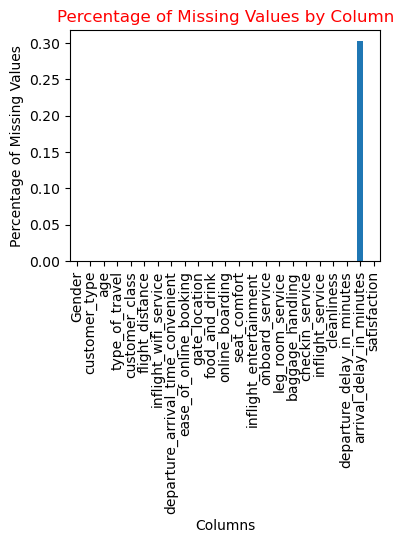

In [9]:
plt.figure(figsize =(4, 3)) 

missing_percentage = (df_airline.isnull().sum() / len(df_airline)) * 100

missing_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values by Column',color='red')
plt.show()

In [10]:
data_no_missing = df_airline.fillna(df_airline.mean(numeric_only=True))

In [11]:
Total = data_no_missing.isnull().sum().sort_values(ascending = False)          
Percent = (data_no_missing.isnull().sum()*100/data_no_missing.isnull().count()).sort_values(ascending = False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Gender,0,0.0
seat_comfort,0,0.0
arrival_delay_in_minutes,0,0.0
departure_delay_in_minutes,0,0.0
cleanliness,0,0.0
inflight_service,0,0.0
checkin_service,0,0.0
baggage_handling,0,0.0
leg_room_service,0,0.0
onboard_service,0,0.0


In [12]:
airline = data_no_missing.copy(deep =True )
airline.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


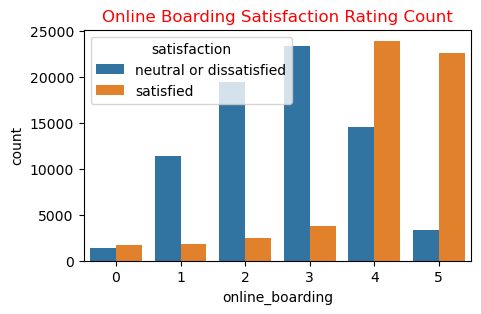

In [13]:
plt.figure(figsize =(5, 3)) 
sns.countplot(x = "online_boarding", hue="satisfaction",data = df_airline)
plt.title("Online Boarding Satisfaction Rating Count",color='red')
plt.show()

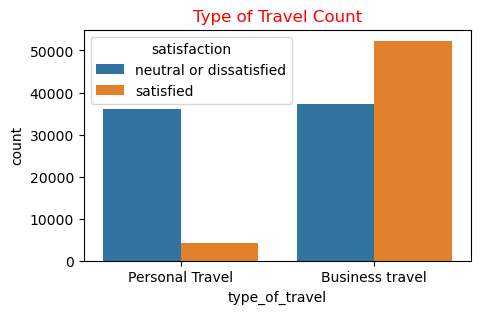

In [14]:
plt.figure(figsize =(5, 3)) 
sns.countplot(x = "type_of_travel",hue="satisfaction", data = df_airline)
plt.title("Type of Travel Count",color='red')
plt.show()

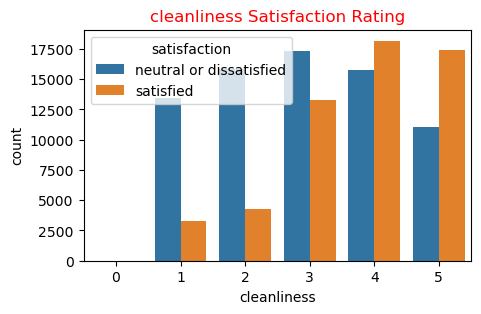

In [15]:
plt.figure(figsize =(5, 3)) 
sns.countplot(x = "cleanliness",hue="satisfaction", data = df_airline)
plt.title("cleanliness Satisfaction Rating",color='red')
plt.show()

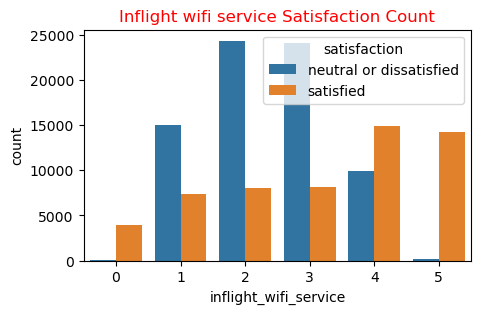

In [16]:
plt.figure(figsize =(5, 3)) 
sns.countplot(x = "inflight_wifi_service", hue="satisfaction",data = df_airline)
plt.title("Inflight wifi service Satisfaction Count",color='red')
plt.show()

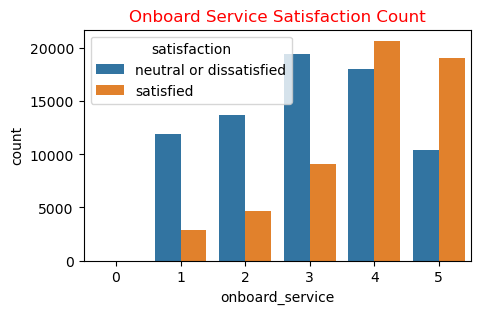

In [17]:
plt.figure(figsize =(5, 3)) 
sns.countplot(x = "onboard_service",hue="satisfaction", data = df_airline)
plt.title("Onboard Service Satisfaction Count",color='red')
plt.show()

In [18]:
df_features = airline.iloc[:, airline.columns != 'satisfaction']
df_target = airline.iloc[:,airline.columns == 'satisfaction']

In [19]:
df_target.value_counts()

satisfaction           
neutral or dissatisfied    73452
satisfied                  56428
dtype: int64

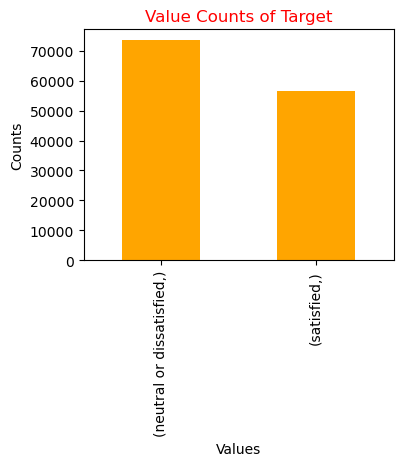

In [20]:
plt.figure(figsize =(4, 3)) 
df_target.value_counts().plot(kind='bar', color='orange')

plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Value Counts of Target',color='red')

plt.show()

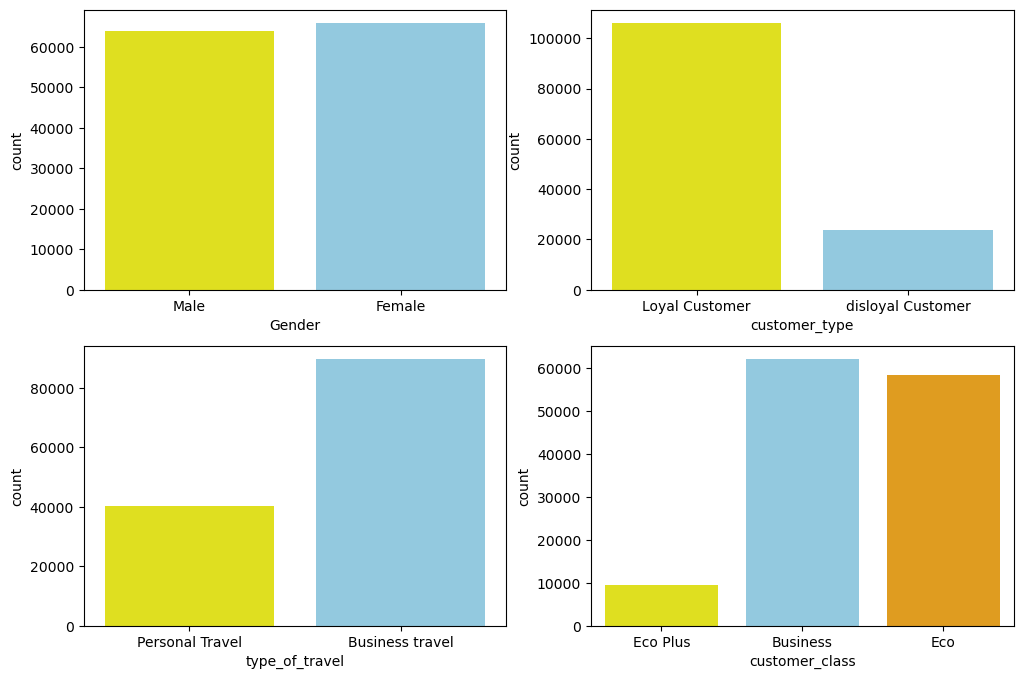

In [21]:
categorical = [ ]
for column in df_features:
    if is_string_dtype(df_features[column]):
        categorical.append(column)

colors = ['yellow',"skyblue","orange"]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x=variable, data=df_features, ax=subplot, palette=colors)

plt.show()

In [22]:
df_cat = airline[categorical]
df_cat.head()

,Gender,customer_type,type_of_travel,customer_class
0,Male,Loyal Customer,Personal Travel,Eco Plus
1,Male,disloyal Customer,Business travel,Business
2,Female,Loyal Customer,Business travel,Business
3,Female,Loyal Customer,Business travel,Business
4,Male,Loyal Customer,Business travel,Business


In [23]:
df_cat_dummies = pd.get_dummies(df_cat, drop_first = True)
df_cat_dummies.head()

,Gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,customer_class_Eco,customer_class_Eco Plus
0,1,0,1,0,1
1,1,1,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,1,0,0,0,0


In [24]:
df_num = airline.drop(categorical, axis = 1)
df_num.head()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [25]:
standardScaler=StandardScaler()
fit=['age', 'flight_distance', 'departure_delay_in_minutes',"arrival_delay_in_minutes"]
df_num[fit]=standardScaler.fit_transform(df_num[fit])
df_num.head()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,-1.747961,-0.732184,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0.270187,0.075738,neutral or dissatisfied
1,-0.954274,-0.957760,3,2,3,3,1,3,1,1,1,5,3,1,4,1,-0.360214,-0.236703,neutral or dissatisfied
2,-0.888133,-0.048440,2,2,2,2,5,5,5,5,4,3,4,4,4,5,-0.386481,-0.392924,satisfied
3,-0.954274,-0.629924,2,5,5,5,2,2,2,2,2,5,3,1,4,2,-0.097547,-0.158593,neutral or dissatisfied
4,1.426788,-0.978814,3,3,3,3,4,5,5,3,3,4,4,3,3,3,-0.386481,-0.392924,satisfied


In [26]:
df_dummy = pd.concat([df_num, df_cat_dummies], axis=1)
df_dummy.head()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,Gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,customer_class_Eco,customer_class_Eco Plus
0,-1.747961,-0.732184,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0.270187,0.075738,neutral or dissatisfied,1,0,1,0,1
1,-0.954274,-0.957760,3,2,3,3,1,3,1,1,1,5,3,1,4,1,-0.360214,-0.236703,neutral or dissatisfied,1,1,0,0,0
2,-0.888133,-0.048440,2,2,2,2,5,5,5,5,4,3,4,4,4,5,-0.386481,-0.392924,satisfied,0,0,0,0,0
3,-0.954274,-0.629924,2,5,5,5,2,2,2,2,2,5,3,1,4,2,-0.097547,-0.158593,neutral or dissatisfied,0,0,0,0,0
4,1.426788,-0.978814,3,3,3,3,4,5,5,3,3,4,4,3,3,3,-0.386481,-0.392924,satisfied,1,0,0,0,0


In [27]:
corr = df_dummy.corr()
corr.head()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,Gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,customer_class_Eco,customer_class_Eco Plus
age,1.000000,0.099459,0.016116,0.036960,0.022565,-0.000398,0.023194,0.207572,0.159136,0.074947,0.057078,0.039119,-0.047991,0.033475,-0.051347,0.052565,-0.009041,-0.011229,0.008996,-0.284172,-0.044808,-0.132597,-0.012922
flight_distance,0.099459,1.000000,0.006701,-0.018914,0.065165,0.005520,0.057066,0.214825,0.157662,0.130507,0.111194,0.134533,0.064855,0.073608,0.059316,0.095648,0.002402,-0.001932,0.003616,-0.226021,-0.266792,-0.403881,-0.124198
inflight_wifi_service,0.016116,0.006701,1.000000,0.344915,0.714807,0.338573,0.132214,0.457445,0.121513,0.207802,0.119928,0.160317,0.120376,0.043762,0.110029,0.131300,-0.015946,-0.017721,0.005901,-0.005757,-0.105865,-0.037176,0.005747
departure_arrival_time_convenient,0.036960,-0.018914,0.344915,1.000000,0.437620,0.447510,0.000687,0.072287,0.008666,-0.008380,0.067297,0.010617,0.070833,0.091132,0.072195,0.009862,0.000778,-0.000941,0.008995,-0.206873,0.257102,0.079799,0.027894
ease_of_online_booking,0.022565,0.065165,0.714807,0.437620,1.000000,0.460041,0.030514,0.404866,0.028561,0.046564,0.039064,0.109450,0.039148,0.008819,0.035373,0.015125,-0.005318,-0.007022,0.005893,-0.018059,-0.134078,-0.099132,-0.018919


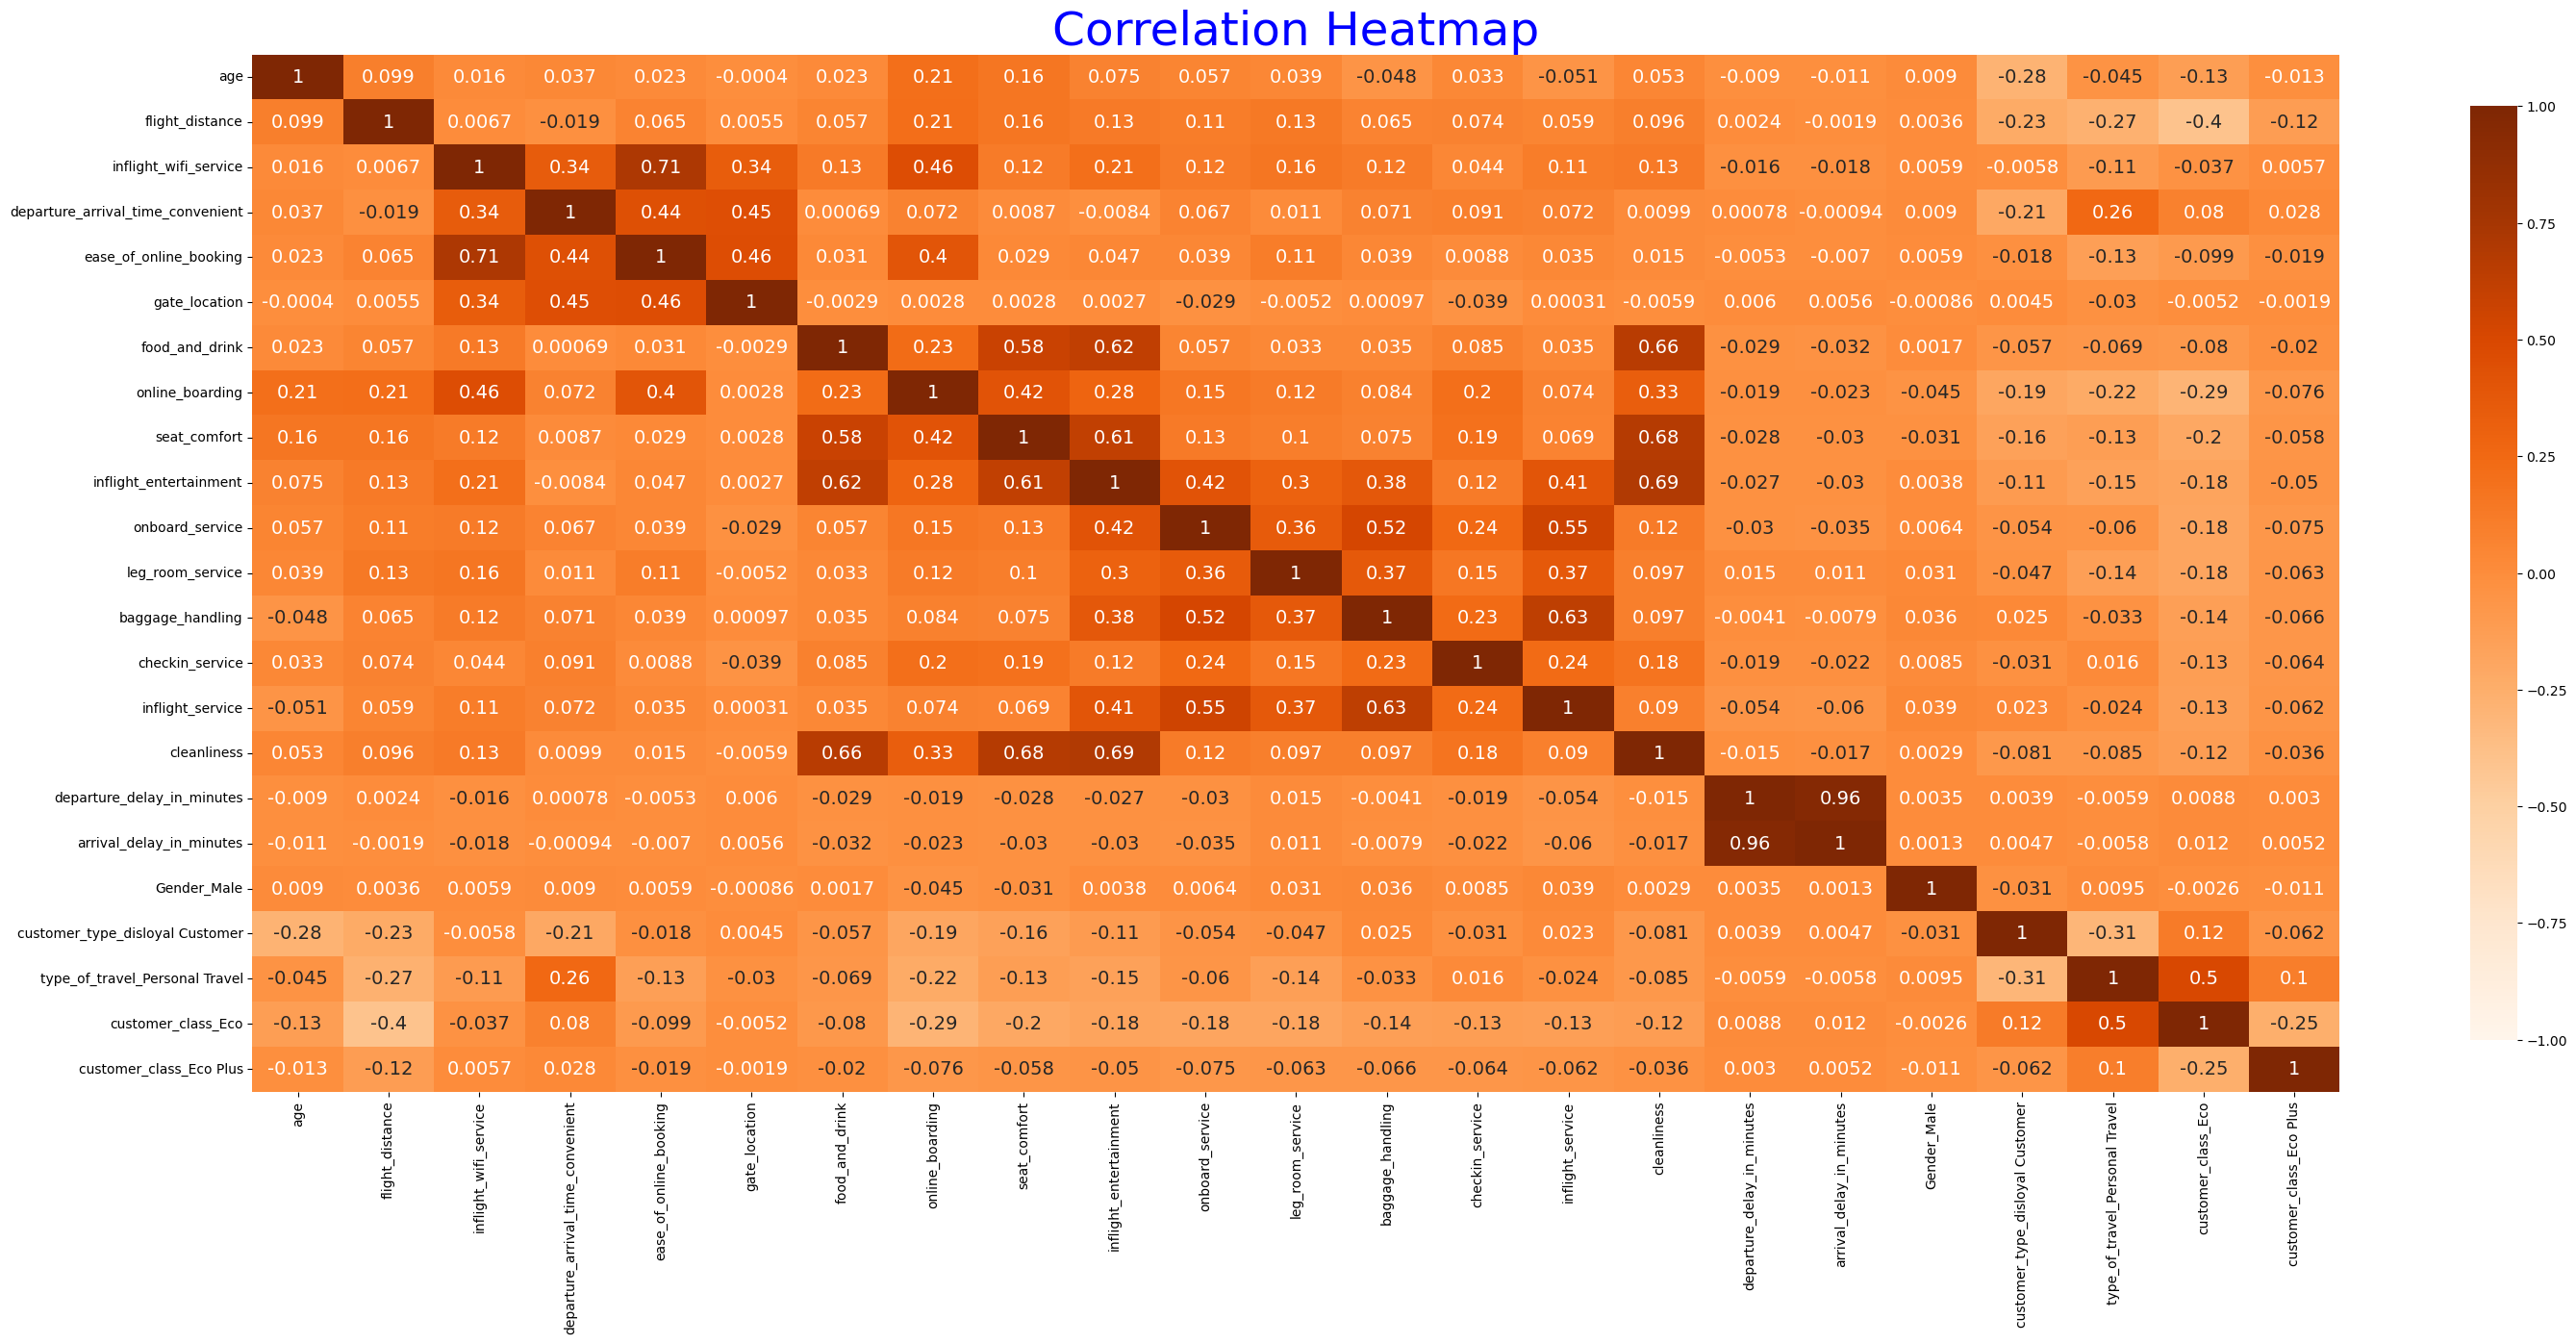

In [28]:
plt.figure(figsize=(35, 14))  

sns.heatmap(corr, cmap='Oranges', vmax=1.0, vmin=-1.0, annot=True, annot_kws={"size": 14 }, cbar=True,
            cbar_kws={"shrink": 0.9}) 
plt.title('Correlation Heatmap',fontsize=35,color='blue')
plt.show()

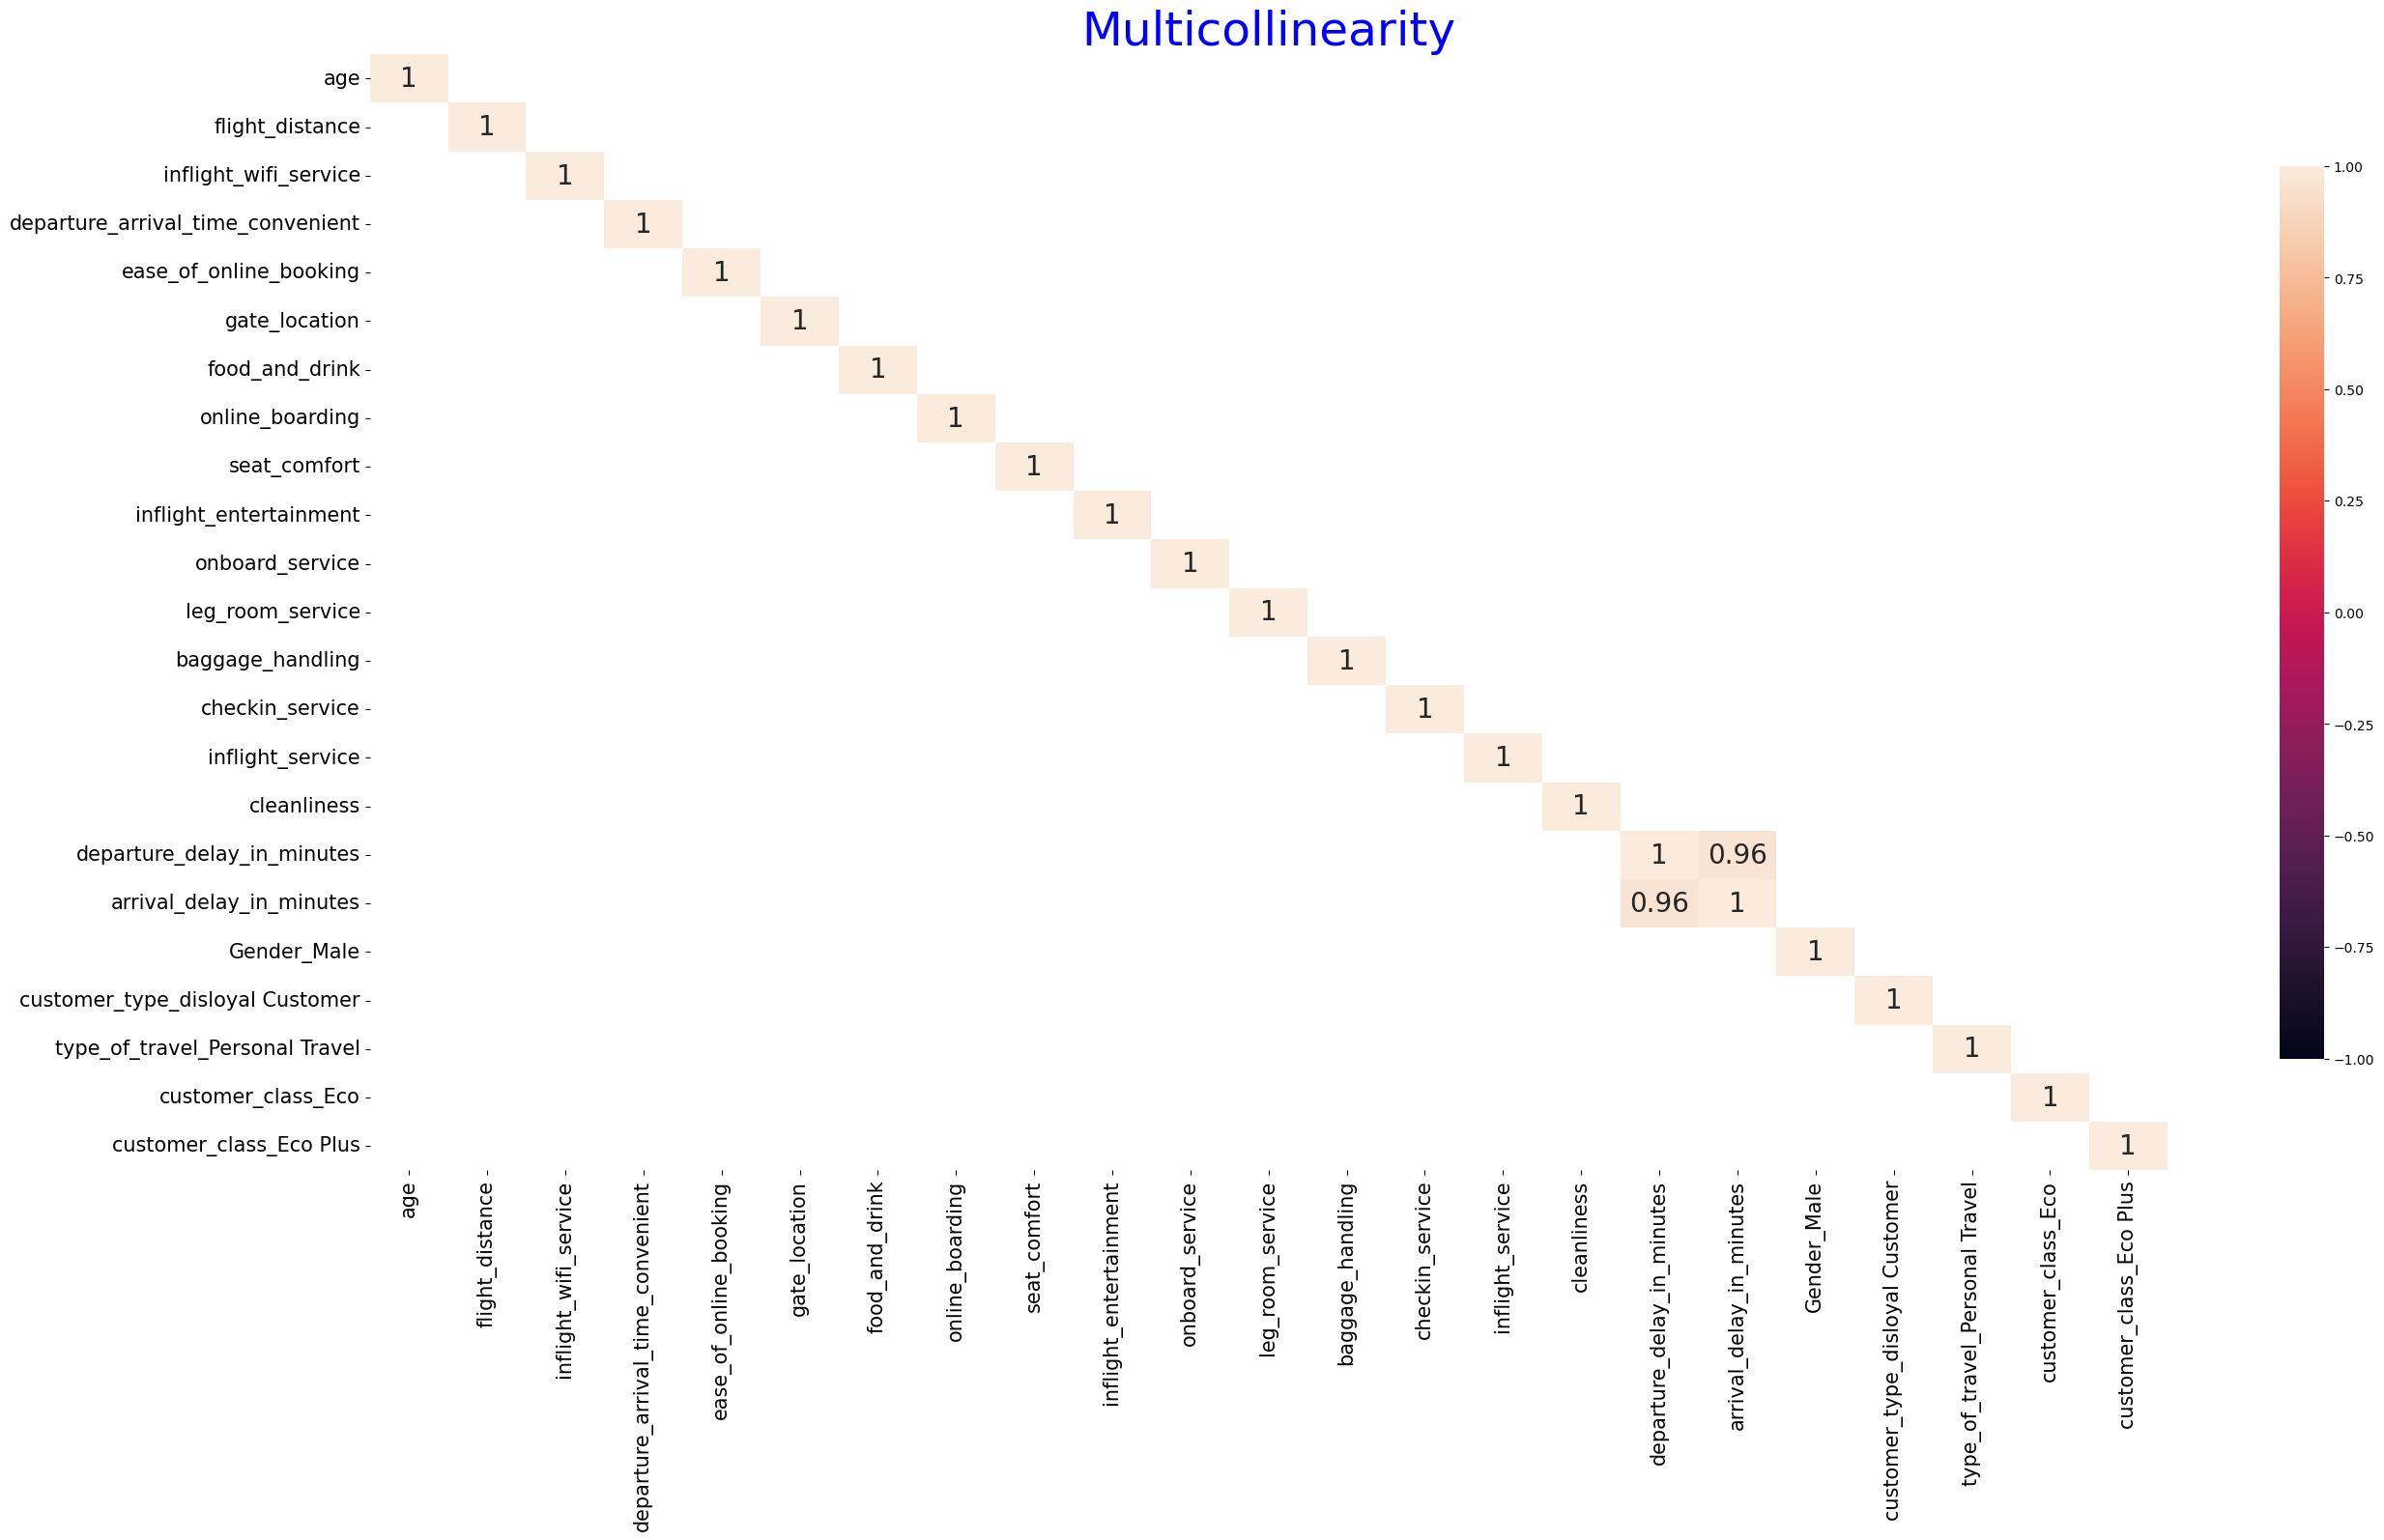

In [29]:
plt.figure(figsize=(30, 15))
sns.heatmap(corr[(corr >= 0.75) | (corr <= -0.75)], vmax = 1.0, vmin = -1.0, annot = True, 
            annot_kws={"size": 20},cbar_kws={"shrink": 0.8})

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Multicollinearity',fontsize=35,color='blue')

plt.show()

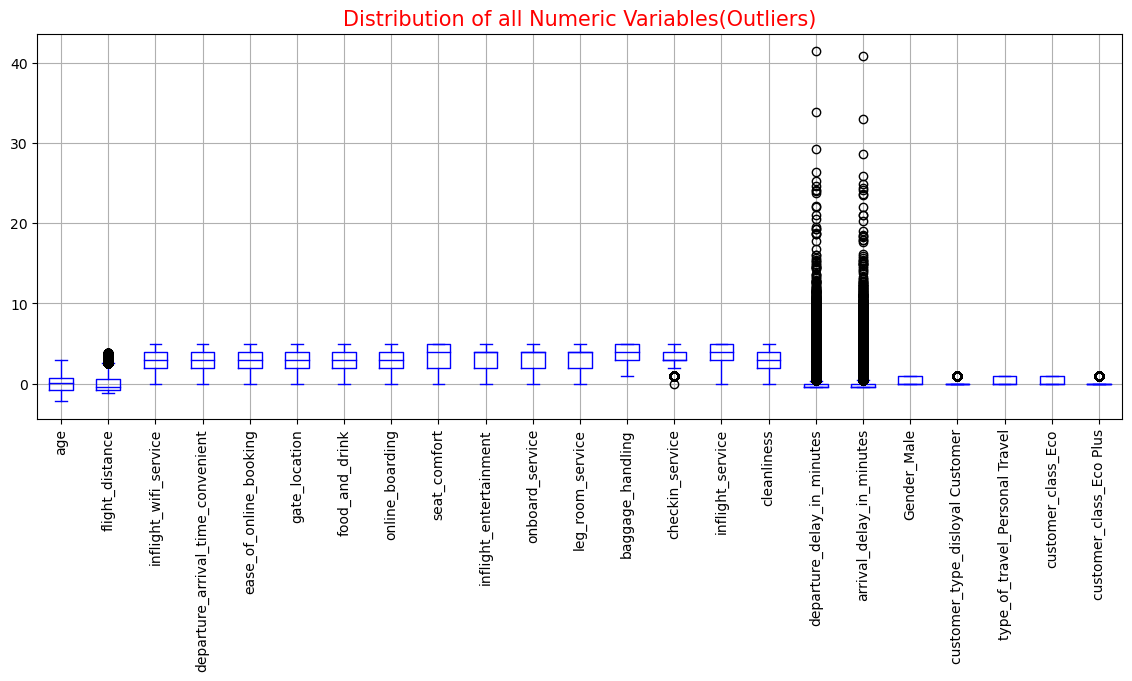

In [30]:
plt.figure(figsize=(14, 5))

df_dummy.boxplot(color="blue")
plt.title('Distribution of all Numeric Variables(Outliers)', fontsize = 15,color="red")
plt.xticks(rotation = 'vertical', fontsize = 10)

plt.show()

In [31]:
df_dummy.columns

Index(['age', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction', 'Gender_Male', 'customer_type_disloyal Customer',
       'type_of_travel_Personal Travel', 'customer_class_Eco',
       'customer_class_Eco Plus'],
      dtype='object')

In [32]:
df_dummy.drop(["gate_location","inflight_entertainment","leg_room_service","departure_delay_in_minutes",
              "arrival_delay_in_minutes","Gender_Male"],axis=1,inplace=True)

In [33]:
m = pd.DataFrame(df_dummy['satisfaction'])
m.head()

,satisfaction
0,neutral or dissatisfied
1,neutral or dissatisfied
2,satisfied
3,neutral or dissatisfied
4,satisfied


In [34]:
y = pd.get_dummies(data=m, columns=['satisfaction'], drop_first=True)


y.rename(columns={'satisfaction_satisfied': 'satisfaction'}, inplace=True)
y.head()


,satisfaction
0,0
1,0
2,1
3,0
4,1


In [35]:
X = df_dummy.drop('satisfaction',axis = 1)
X.head()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,onboard_service,baggage_handling,checkin_service,inflight_service,cleanliness,customer_type_disloyal Customer,type_of_travel_Personal Travel,customer_class_Eco,customer_class_Eco Plus
0,-1.747961,-0.732184,3,4,3,5,3,5,4,4,4,5,5,0,1,0,1
1,-0.954274,-0.957760,3,2,3,1,3,1,1,3,1,4,1,1,0,0,0
2,-0.888133,-0.048440,2,2,2,5,5,5,4,4,4,4,5,0,0,0,0
3,-0.954274,-0.629924,2,5,5,2,2,2,2,3,1,4,2,0,0,0,0
4,1.426788,-0.978814,3,3,3,4,5,5,3,4,3,3,3,0,0,0,0


In [36]:
def get_test_report(model):
    return(classification_report(y_test, y_pred))

In [37]:
def kappa_score(model):
    return(cohen_kappa_score(y_test, y_pred))

In [38]:
def plot_confusion_matrix(model, cmap='YlOrBr'):
    cm = confusion_matrix(y_test,y_pred)
    
    conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],
                            index=['Actual:0','Actual:1'])
    
    sns.heatmap(conf_matrix,annot=True,fmt='d',cmap=ListedColormap(['Lightskyblue']),
               cbar=False,linewidths=0.1,annot_kws={"size":20})
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

In [39]:
def plot_roc(model):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    
    plt.plot(fpr, tpr, color='green')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1], 'r--')
    
    plt.title('ROC Curve for Passenger Satisfaction Classifier', fontsize=15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize=12)
    plt.ylabel('True positive rate (Sensitivity)', fontsize=12)

    auc_score = round(roc_auc_score(y_test, y_pred), 4)
    plt.text(x=0.5, y=0.3, s=f'AUC Score: {auc_score}', fontsize=12, ha='center', va='center', 
             bbox=dict(facecolor='blue', alpha=0.5))

    plt.grid(True)

In [40]:
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score',
                                   'Accuracy Score', 'Kappa Score', 'f1-score'])
def update_score_card(model_name):
    global score_card
    score_card = score_card.append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return(score_card)

<a id='LogisticReg'></a>
# 5. Logistic Regression 

Logistic regression is one of the techniques used for classification. The estimates of the parameters are obtained by maximizing the likelihood function.

<a id='withStatsModels'></a>
## 5.1 Logistic Regression (using MLE)

**1. Introduce the intercept term**

In [41]:
X = sm.add_constant(X)
X.head()

,const,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,onboard_service,baggage_handling,checkin_service,inflight_service,cleanliness,customer_type_disloyal Customer,type_of_travel_Personal Travel,customer_class_Eco,customer_class_Eco Plus
0,1.0,-1.747961,-0.732184,3,4,3,5,3,5,4,4,4,5,5,0,1,0,1
1,1.0,-0.954274,-0.957760,3,2,3,1,3,1,1,3,1,4,1,1,0,0,0
2,1.0,-0.888133,-0.048440,2,2,2,5,5,5,4,4,4,4,5,0,0,0,0
3,1.0,-0.954274,-0.629924,2,5,5,2,2,2,2,3,1,4,2,0,0,0,0
4,1.0,1.426788,-0.978814,3,3,3,4,5,5,3,4,3,3,3,0,0,0,0


**2. Split the dataset into train and test sets**

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90916, 18)
(90916, 1)
(38964, 18)
(38964, 1)


#### 3. Build a logistic regression model using statsmodels `Logit()`.

In [43]:
log_reg_model = sm.Logit(y_train, X_train).fit()
log_reg_model.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\Users\schow\anaconda3\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\schow\anaconda3\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           satisfaction   No. Observations:                90916
Model:                          Logit   Df Residuals:                    90898
Method:                           MLE   Df Model:                           17
Date:                Wed, 28 Feb 2024   Pseudo R-squ.:                     inf
Time:                        14:40:37   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -5.8325      0.064    -90.992      0.000      -5.958      -5.707
age                                  -0.1295      0.011    -11.285      0.000      -0.152      -0.107
flight_distance                      -0.0168      0.012     -1.419      0.156      -0.040       0.006
inflight_wifi_service                 0.4309      0.012     36.015      0.000       0.407       0.454
departure_arrival_time_convenient    -0.1301      0.008    -15.751      0.000      -0.146      -0.114
ease_of_online_booking               -0.1407      0.011    -12.401      0.000      -0.163      -0.118
food_and_drink                       -0.0072      0.010     -0.694      0.487      -0.028       0.013
online_boarding                       0.5756      0.010     55.333      0.000       0.555       0.596
seat_comfort                          0.0843      0.011      7.379      0.000       0.062       0.107
onboard_service                       0.3517      0.011     33.489      0.000       0.331       0.372
baggage_handling                      0.1839      0.012     15.369      0.000       0.160       0.207
checkin_service                       0.3164      0.009     35.479      0.000       0.299       0.334
inflight_service                      0.1908      0.012     15.537      0.000       0.167       0.215
cleanliness                           0.2532      0.012     21.807      0.000       0.230       0.276
customer_type_disloyal Customer      -2.1190      0.031    -67.727      0.000      -2.180      -2.058
type_of_travel_Personal Travel       -2.8327      0.033    -84.852      0.000      -2.898      -2.767
customer_class_Eco                   -0.7488      0.027    -27.550      0.000      -0.802      -0.695
customer_class_Eco Plus              -0.8013      0.044    -18.297      0.000      -0.887      -0.715
=====================================================================================================
"""

**4. Do predictions on the test set**

In [44]:
y_pred_prob = log_reg_model.predict(X_test)
y_pred_prob.head()

94561    0.590661
87433    0.814522
31199    0.114467
79610    0.222454
30433    0.306174
dtype: float64

In [45]:
y_pred = ['0' if x < 0.5 else '1' for x in y_pred_prob]


In [46]:
y_pred = np.array(y_pred, dtype=np.float32)
y_pred[0:5]

array([1., 1., 0., 0., 0.], dtype=float32)

#### 5. Calculate the performance measures.

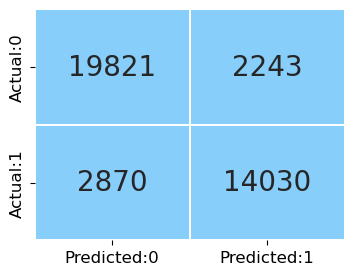

In [47]:
plt.figure(figsize=(4, 3))
plot_confusion_matrix(log_reg_model)


**Calculate performance measures on the test set.**

In [48]:
test_report=get_test_report(log_reg_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     22064
           1       0.86      0.83      0.85     16900

    accuracy                           0.87     38964
   macro avg       0.87      0.86      0.87     38964
weighted avg       0.87      0.87      0.87     38964



In [49]:
kappa_value= kappa_score(log_reg_model)
print(kappa_value)

0.7316954551150341


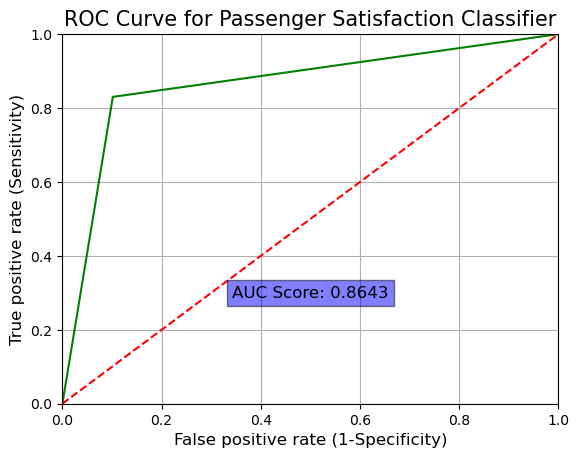

In [50]:
plot_roc(log_reg_model)

**6. Tabulate the results.**

In [51]:
update_score_card(model_name= 'Logistic Regression')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.864259,0.862164,0.830178,0.868776,0.731695,0.845869


<a id='usingSGD'></a>
## 5.2 Logistic Regression (using SGD)

**1. Build the model**


In [52]:
SGD = SGDClassifier(loss = 'log_loss', random_state = 10)

logreg_with_SGD = SGD.fit(X_train, y_train)

**2. Do predictions on the test set**

In [53]:
y_pred_prob = logreg_with_SGD.predict(X_test)
y_pred_prob

array([1, 1, 0, ..., 0, 0, 0], dtype=uint8)

#### 3. Calculate the performance measures.

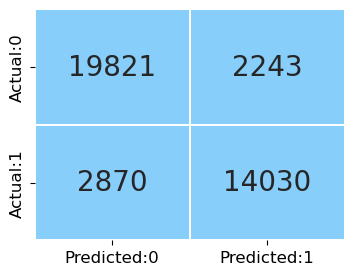

In [54]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(4, 3))
plot_confusion_matrix(logreg_with_SGD)

In [55]:
kappa_value= kappa_score(logreg_with_SGD)
print(kappa_value)

0.7316954551150341


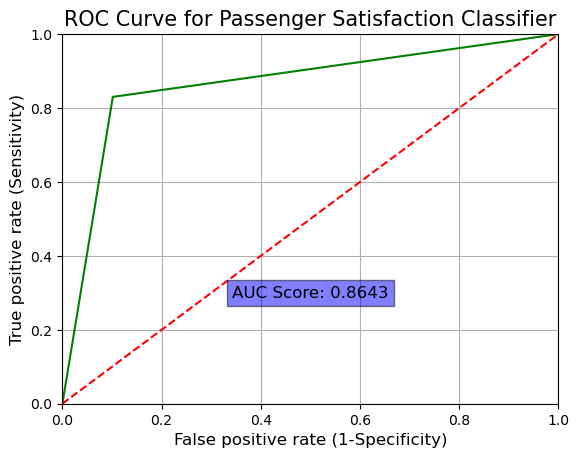

In [56]:
plot_roc(logreg_with_SGD)

**4. Tabulate the results**

In [57]:
update_score_card(model_name= 'Logistic Regression (SGD)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.864259,0.862164,0.830178,0.868776,0.731695,0.845869
1,Logistic Regression (SGD),0.864259,0.862164,0.830178,0.868776,0.731695,0.845869


<a id='Random_Forest'></a>
# 6.  Random Forest

**1. Build model using RandomForestClassifier**

In [58]:

rf_clf = RandomForestClassifier(n_estimators=100, random_state=10)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

**2. Predict the values using test set**

In [59]:
y_pred = rf_clf.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=uint8)

#### 3. Calculate the performance measures.

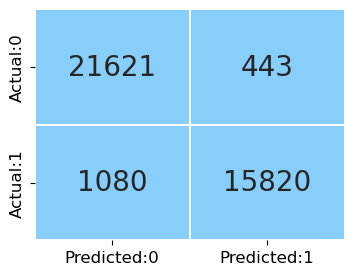

In [60]:
plt.figure(figsize=(4, 3))
plot_confusion_matrix(rf_clf)

In [61]:
test_report=get_test_report(rf_clf)
print(test_report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     22064
           1       0.97      0.94      0.95     16900

    accuracy                           0.96     38964
   macro avg       0.96      0.96      0.96     38964
weighted avg       0.96      0.96      0.96     38964



In [62]:
kappa_value= kappa_score(rf_clf)
print(kappa_value)

0.9200750552613489


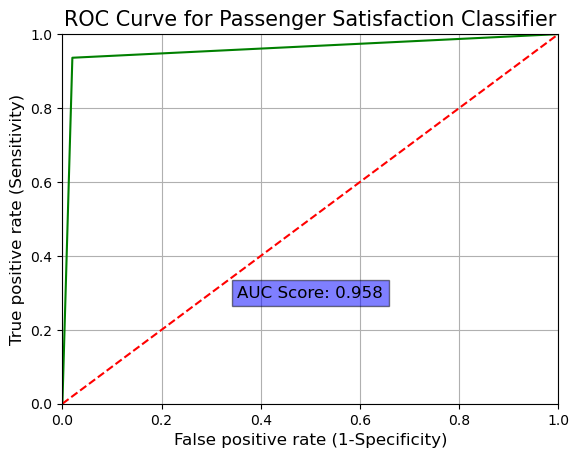

In [63]:
plot_roc(rf_clf)

**4. Tabulate the results**

In [64]:
update_score_card(model_name= 'Random Forest')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.864259,0.862164,0.830178,0.868776,0.731695,0.845869
1,Logistic Regression (SGD),0.864259,0.862164,0.830178,0.868776,0.731695,0.845869
2,Random Forest,0.958008,0.972760,0.936095,0.960913,0.920075,0.954075


<a id='DecisionTree'> </a>
# 7. Decision Tree

<a id='DecisionTree'> </a>
# 7.1 Decision Tree(Entropy)

**1. Build the model**

In [65]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

decision_tree_model = decision_tree.fit(X_train, y_train)

**2. Do predictions on the test set**

In [66]:
y_pred = decision_tree_model.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=uint8)

**3. Compute accuracy measures**

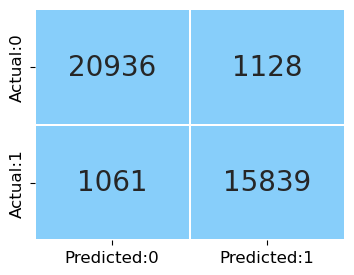

In [67]:
plt.figure(figsize=(4, 3))

plot_confusion_matrix(decision_tree_model)

In [68]:
test_report = get_test_report(decision_tree_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     22064
           1       0.93      0.94      0.94     16900

    accuracy                           0.94     38964
   macro avg       0.94      0.94      0.94     38964
weighted avg       0.94      0.94      0.94     38964



In [69]:
kappa_value = kappa_score(decision_tree_model)
print(kappa_value)

0.8856840293997291


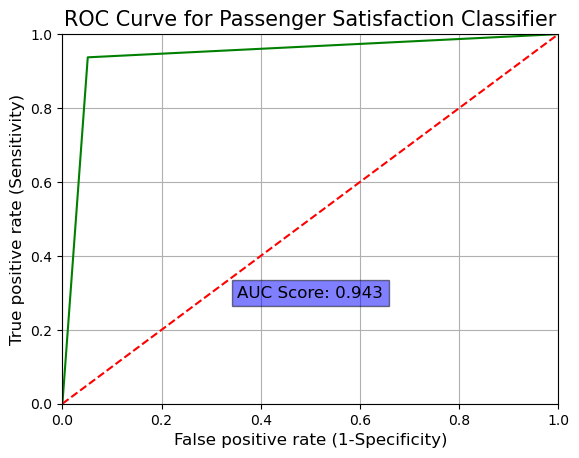

In [70]:
plot_roc(decision_tree_model)


**4. Tabulate the results**

In [71]:
update_score_card(model_name = 'Decision Tree (ENTROPY)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.864259,0.862164,0.830178,0.868776,0.731695,0.845869
1,Logistic Regression (SGD),0.864259,0.862164,0.830178,0.868776,0.731695,0.845869
2,Random Forest,0.958008,0.972760,0.936095,0.960913,0.920075,0.954075
3,Decision Tree (ENTROPY),0.943047,0.933518,0.937219,0.943820,0.885684,0.935365


<a id='DecisionTreewithGridSearchCv'> </a>
## 7.2 Decision Tree (using GridSearchCV)

**1. Use GridSearch to obtain the optimal values of hyperparameters**

In [72]:
tuned_paramaters = [{'criterion': ['gini', 'entropy'],
                     'min_samples_split': [10, 20, 30],
                     'max_depth': [3, 5, 7],
                     'min_samples_leaf': [15, 20, 25, 30],
                     'max_leaf_nodes': [5, 10, 15, 20, 25]}]

In [73]:
from sklearn.model_selection import GridSearchCV

decision_tree_classification = DecisionTreeClassifier(random_state = 10)
grid = GridSearchCV(estimator = decision_tree_classification, param_grid = tuned_paramaters, cv = 10)

dt_grid = grid.fit(X_train, y_train)

print('Best parameters for decision tree classifier: ', dt_grid.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 7, 'max_leaf_nodes': 25, 'min_samples_leaf': 15, 'min_samples_split': 10} 



**2. Build the model using the hyperparameters obtained in step 1**

In [74]:
dt_grid_model = DecisionTreeClassifier(criterion = dt_grid.best_params_.get('criterion'),
                                       max_depth = dt_grid.best_params_.get('max_depth'),
                                       max_leaf_nodes = dt_grid.best_params_.get('max_leaf_nodes'),
                                       min_samples_leaf = dt_grid.best_params_.get('min_samples_leaf'),
                                       min_samples_split = dt_grid.best_params_.get('min_samples_split'),
                                       random_state = 10)

dt_grid_model = dt_grid_model.fit(X_train, y_train)

**3. Do predictions on the test set**

In [75]:
y_pred = dt_grid_model.predict(X_test)

**4. Compute accuracy measures**

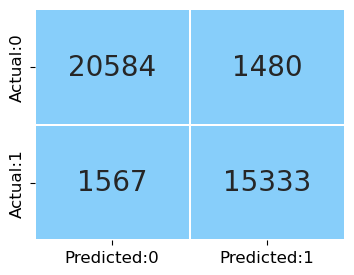

In [76]:
plt.figure(figsize=(4, 3))

plot_confusion_matrix(dt_grid_model)

In [77]:
test_report = get_test_report(dt_grid_model)

print(test_report)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     22064
           1       0.91      0.91      0.91     16900

    accuracy                           0.92     38964
   macro avg       0.92      0.92      0.92     38964
weighted avg       0.92      0.92      0.92     38964



In [78]:
kappa_value = kappa_score(dt_grid_model)

print(kappa_value)

0.8407069787607298


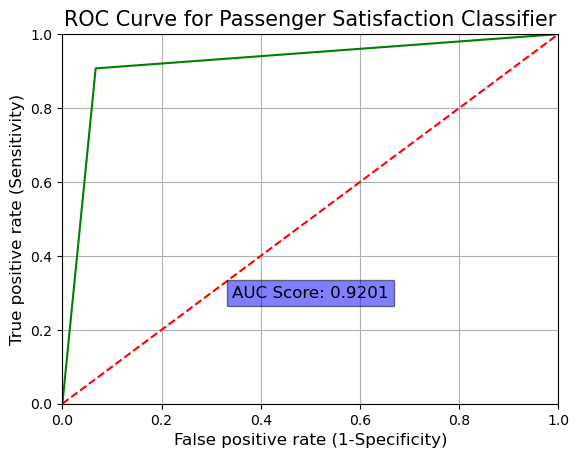

In [79]:
plot_roc(dt_grid_model)

**4. Tabulate the results**

In [80]:
update_score_card(model_name = 'Decision Tree (GridSearchCV)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.864259,0.862164,0.830178,0.868776,0.731695,0.845869
1,Logistic Regression (SGD),0.864259,0.862164,0.830178,0.868776,0.731695,0.845869
2,Random Forest,0.958008,0.972760,0.936095,0.960913,0.920075,0.954075
3,Decision Tree (ENTROPY),0.943047,0.933518,0.937219,0.943820,0.885684,0.935365
4,Decision Tree (GridSearchCV),0.920100,0.911973,0.907278,0.921800,0.840707,0.909619


In [91]:
feat_labels = X.columns.values
feature_importances_ = []  # Corrected variable name

# Assuming rf_clf is your RandomForestClassifier instance
for feature in zip(feat_labels, rf_clf.feature_importances_):
    # Print(feature)
    feature_importances_.append(feature)


In [92]:
feature_importances_

[('const', 0.0),
 ('age', 0.041057000829690354),
 ('flight_distance', 0.049963786014683424),
 ('inflight_wifi_service', 0.14756087340476542),
 ('departure_arrival_time_convenient', 0.020700918515714553),
 ('ease_of_online_booking', 0.040505655636456306),
 ('food_and_drink', 0.014512457832470462),
 ('online_boarding', 0.18885252628173269),
 ('seat_comfort', 0.06643060850124365),
 ('onboard_service', 0.04595716641038645),
 ('baggage_handling', 0.03376811017405055),
 ('checkin_service', 0.028443610912724217),
 ('inflight_service', 0.03106118638763306),
 ('cleanliness', 0.035651859050576044),
 ('customer_type_disloyal Customer', 0.04487431627568489),
 ('type_of_travel_Personal Travel', 0.1230146423915662),
 ('customer_class_Eco', 0.07797268192344338),
 ('customer_class_Eco Plus', 0.009672599457178329)]

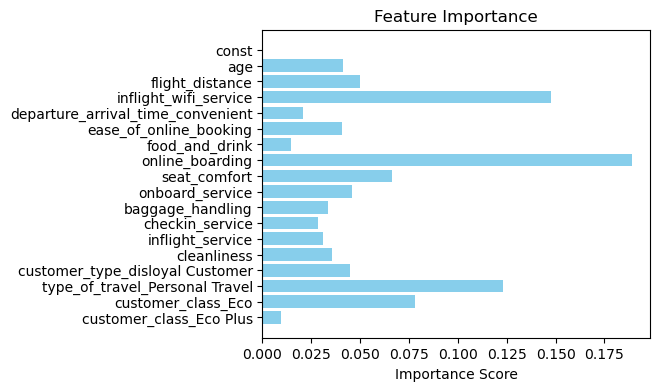

In [94]:
import matplotlib.pyplot as plt

feature_importance = [('const', 0.0),
 ('age', 0.041057000829690354),
 ('flight_distance', 0.049963786014683424),
 ('inflight_wifi_service', 0.14756087340476542),
 ('departure_arrival_time_convenient', 0.020700918515714553),
 ('ease_of_online_booking', 0.040505655636456306),
 ('food_and_drink', 0.014512457832470462),
 ('online_boarding', 0.18885252628173269),
 ('seat_comfort', 0.06643060850124365),
 ('onboard_service', 0.04595716641038645),
 ('baggage_handling', 0.03376811017405055),
 ('checkin_service', 0.028443610912724217),
 ('inflight_service', 0.03106118638763306),
 ('cleanliness', 0.035651859050576044),
 ('customer_type_disloyal Customer', 0.04487431627568489),
 ('type_of_travel_Personal Travel', 0.1230146423915662),
 ('customer_class_Eco', 0.07797268192344338),
 ('customer_class_Eco Plus', 0.009672599457178329)]

# Extract feature names and importance scores
feature_names = [x[0] for x in feature_importance]
importance_scores = [x[1] for x in feature_importance]

# Plot
plt.figure(figsize=(5, 4))
plt.barh(feature_names, importance_scores, color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  
plt.show()
